In [1]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import numpy as np

In [2]:
# Carregar o modelo e o tokenizer do DistilBERT - é utilizado um modelo de tokens e depois o embeddings 
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
embedding_model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [3]:
# Sentenças

in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [4]:
print("Len list: " + str(len(input_text_lst_news)))
print(input_text_lst_news)

Len list: 7
['Missing flamingo discovered at swimming pool', 'Sea otter spotted on surfboard by beach', 'Baby panda enjoys boat ride', 'Breakfast themed food truck beloved by all!', 'New curry restaurant aims to please!', 'Python developers are wonderful people', 'TypeScript, C++ or Java? All are great!']


In [5]:
# Gerar embeddings para cada texto
embeddings = []

for input_text in input_text_lst_news:
    # Tokenizar o texto com truncação e padding
    inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', truncation=True, max_length=15)
    
    # Passar os tokens pelo modelo
    with torch.no_grad():  # Desabilitar o cálculo de gradientes para economizar memória
        outputs = embedding_model(**inputs)

    # O output do modelo é um dicionário, e a última camada é armazenada em 'last_hidden_state'
    last_hidden_state = outputs.last_hidden_state  # Shape: [batch_size, seq_len, hidden_size]

    # Pegando o embedding do token [CLS] (primeiro token)
    # O [CLS] é sempre o primeiro token (índice 0)
    cls_embedding = last_hidden_state[0][0].numpy()  # [0][0] para pegar o embedding do [CLS]
    
    embeddings.append(cls_embedding)

# Converter os embeddings em um array numpy
embeddings_array = np.array(embeddings)  # A forma deve ser (7, 768)
print(embeddings_array.shape)  # Verificando a forma do array final

(7, 768)


In [6]:
from sklearn.decomposition import PCA

# Utilizar o PCA para transformar as n dimensões em apenas 2 para facilitar a visualização devido a configurações computacionais
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [7]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 3.1024346   0.5346591 ]
 [ 2.981196    1.6120188 ]
 [ 0.7819524  -1.3706772 ]
 [-0.43735945 -1.8045415 ]
 [-1.1255637  -1.7939498 ]
 [-1.9369415   0.9088795 ]
 [-3.3657174   1.9136106 ]]


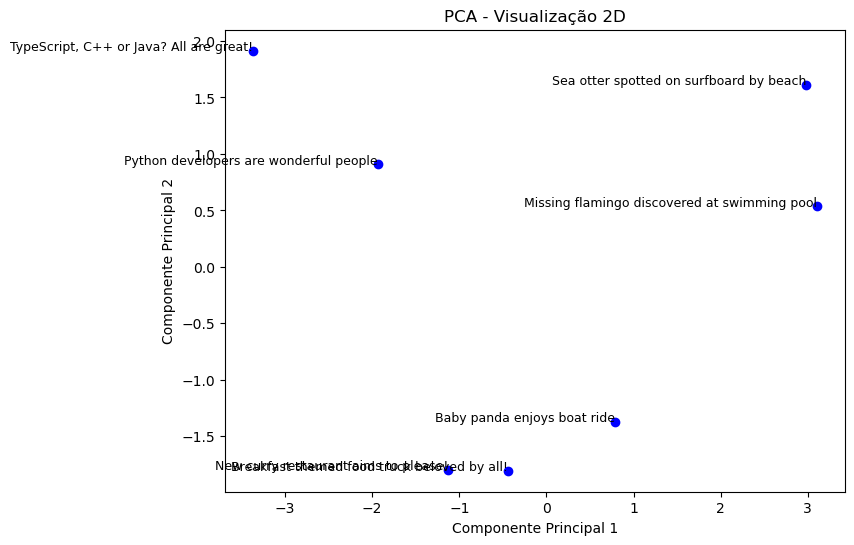

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Função para plotar os valores 2D
def plot_2D(x, y, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', marker='o')  # Plotando os pontos
    
    # Adicionando as labels
    for i, label in enumerate(labels):
        plt.text(x[i], y[i], label, fontsize=9, ha='right')
    
    plt.title("PCA - Visualização 2D")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()

# Aqui você já tem o PCA transformado
# O 'new_values' vem de PCA_model.transform(embeddings_array)
# Ele tem a forma (7, 2) - 7 amostras e 2 componentes principais

# Extrair as 2 componentes principais (colunas 0 e 1)
x = new_values[:, 0]  # Componente Principal 1
y = new_values[:, 1]  # Componente Principal 2

# Agora, use a função plot_2D para visualizar os resultados
plot_2D(x, y, input_text_lst_news)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [10]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

Missing flamingo discovered at swimming pool
Sea otter spotted on surfboard by beach
[[0.9222995]]


In [11]:
print(in_1)
print(in_3)
print(compare(embeddings,0,2))

Missing flamingo discovered at swimming pool
Baby panda enjoys boat ride
[[0.900864]]


In [12]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

Missing flamingo discovered at swimming pool
Breakfast themed food truck beloved by all!
[[0.9039547]]


In [13]:
print(in_1)
print(in_5)
print(compare(embeddings,0,4))

Missing flamingo discovered at swimming pool
New curry restaurant aims to please!
[[0.8837942]]


In [14]:
print(in_1)
print(in_6)
print(compare(embeddings,0,5))

Missing flamingo discovered at swimming pool
Python developers are wonderful people
[[0.8678024]]


In [15]:
print(in_1)
print(in_7)
print(compare(embeddings,0,6))

Missing flamingo discovered at swimming pool
TypeScript, C++ or Java? All are great!
[[0.8364009]]


In [16]:
# Utilizado o mesmo modelo, mas agora ao inves de utilizar o PCA é utilizado o TSNE para reduzir a dimensionalidade dos dados
from sklearn.manifold import TSNE  # Importando o TSNE

# Utilizar o t-SNE para reduzir a dimensionalidade para 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)  # Ajuste de 'perplexity' pode melhorar a visualização
new_values = tsne_model.fit_transform(embeddings_array)

d:\Github\Chat-with-your-docs\conda-gpu\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Github\Chat-with-your-docs\conda-gpu\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Github\Chat-with-your-docs\conda-gpu\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Github\Chat-with-your-docs\conda-gpu\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Github\Chat-with-your-docs\conda-gpu\Lib\

In [17]:
print("Shape após o t-SNE: " + str(new_values.shape))
print(new_values)

Shape após o t-SNE: (7, 2)
[[ 5.6735282e+00 -6.0084011e+01]
 [ 2.5758015e+01 -3.8167839e+01]
 [-1.8664398e+01 -2.9613602e+01]
 [ 1.4912230e-02 -6.4748797e+00]
 [-2.4813396e+01  6.5091825e+00]
 [ 9.1373119e+00  2.6261969e+01]
 [-1.5639964e+01  4.4180702e+01]]


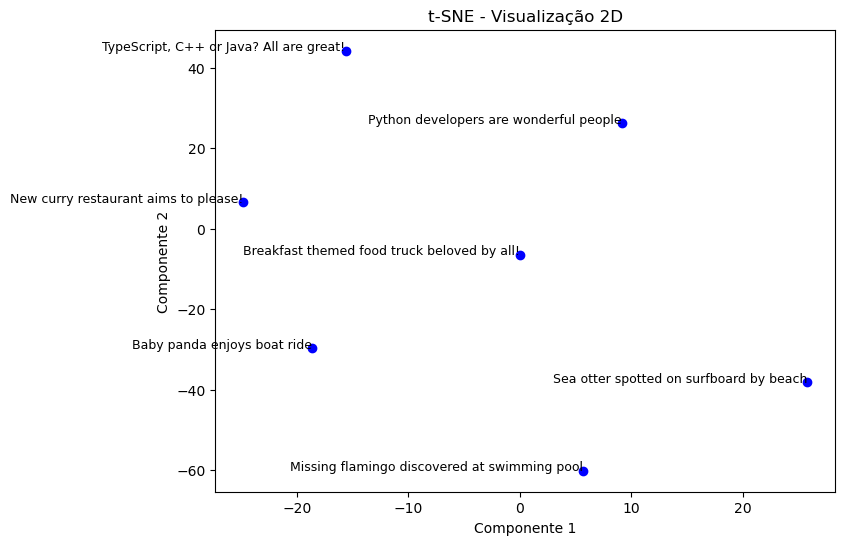

In [18]:
# Função para plotar os valores 2D
def plot_2D(x, y, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', marker='o')  # Plotando os pontos
    
    # Adicionando as labels
    for i, label in enumerate(labels):
        plt.text(x[i], y[i], label, fontsize=9, ha='right')
    
    plt.title("t-SNE - Visualização 2D")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

# Extrair as 2 componentes principais (colunas 0 e 1)
x = new_values[:, 0]  # Componente 1
y = new_values[:, 1]  # Componente 2

# Agora, use a função plot_2D para visualizar os resultados
plot_2D(x, y, input_text_lst_news)

In [19]:
print(in_1)
print(in_2)
print(compare(embeddings, 0, 1))

Missing flamingo discovered at swimming pool
Sea otter spotted on surfboard by beach
[[0.9222995]]


In [20]:
print(in_1)
print(in_3)
print(compare(embeddings, 0, 2))

Missing flamingo discovered at swimming pool
Baby panda enjoys boat ride
[[0.900864]]


In [21]:
print(in_1)
print(in_4)
print(compare(embeddings, 0, 3))

Missing flamingo discovered at swimming pool
Breakfast themed food truck beloved by all!
[[0.9039547]]


In [22]:
print(in_1)
print(in_5)
print(compare(embeddings, 0, 4))

Missing flamingo discovered at swimming pool
New curry restaurant aims to please!
[[0.8837942]]


In [23]:
print(in_1)
print(in_6)
print(compare(embeddings, 0, 5))

Missing flamingo discovered at swimming pool
Python developers are wonderful people
[[0.8678024]]


In [24]:
print(in_1)
print(in_7)
print(compare(embeddings, 0, 6))

Missing flamingo discovered at swimming pool
TypeScript, C++ or Java? All are great!
[[0.8364009]]


In [25]:
# Aqui é utilizado um outro modelo que é mais direto e não precisado do processo de tokenização anteriormente, ele já é feito dentro do modelo
from sentence_transformers import SentenceTransformer
import numpy as np

# Carregar o modelo pré-treinado
model = SentenceTransformer('all-MiniLM-L6-v2')  # Um modelo leve e eficiente

In [26]:
# Gerar embeddings
embeddings = model.encode(input_text_lst_news)

In [27]:
# Ver os embeddings
print(np.array(embeddings).shape)  # Verifique a forma dos embeddings gerados

(7, 384)


In [28]:
print("Shape: " + str(embeddings.shape))
print(embeddings)

Shape: (7, 384)
[[-0.03113913  0.06399768 -0.04083292 ... -0.03473411 -0.00494802
   0.09562775]
 [ 0.01461547  0.0499929   0.04274793 ... -0.07320195 -0.00127853
   0.1773799 ]
 [ 0.02789251 -0.0329995  -0.01896636 ...  0.08502027  0.08180346
   0.03354178]
 ...
 [-0.0016789  -0.06196626  0.00570415 ...  0.01228198 -0.05734608
  -0.02149283]
 [-0.05403014  0.00997776  0.03398558 ...  0.07879556  0.14831726
   0.00816028]
 [-0.12264898 -0.04713411  0.01899858 ... -0.07640287  0.01758964
   0.08268618]]


In [29]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings)
new_values = PCA_model.transform(embeddings)

In [30]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.6163629  -0.12269823]
 [ 0.6128628   0.0478515 ]
 [ 0.23483653 -0.03408433]
 [-0.391619   -0.47903094]
 [-0.42464715 -0.5838827 ]
 [-0.21229067  0.5784005 ]
 [-0.43550563  0.59344447]]


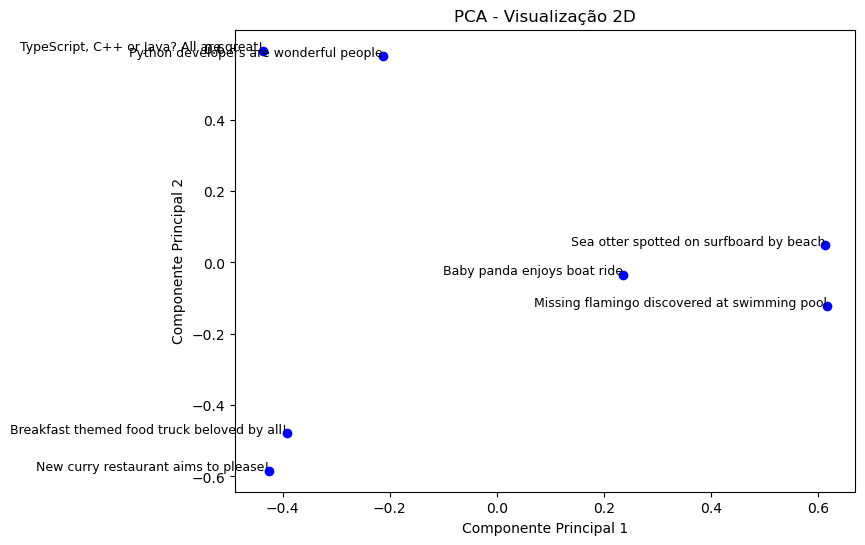

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Função para plotar os valores 2D
def plot_2D(x, y, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', marker='o')  # Plotando os pontos
    
    # Adicionando as labels
    for i, label in enumerate(labels):
        plt.text(x[i], y[i], label, fontsize=9, ha='right')
    
    plt.title("PCA - Visualização 2D")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()

# Aqui você já tem o PCA transformado
# O 'new_values' vem de PCA_model.transform(embeddings_array)
# Ele tem a forma (7, 2) - 7 amostras e 2 componentes principais

# Extrair as 2 componentes principais (colunas 0 e 1)
x = new_values[:, 0]  # Componente Principal 1
y = new_values[:, 1]  # Componente Principal 2

# Agora, use a função plot_2D para visualizar os resultados
plot_2D(x, y, input_text_lst_news)


In [32]:
# Utilizado o mesmo modelo, mas agora ao inves de utilizar o PCA é utilizado o TSNE para reduzir a dimensionalidade dos dados
from sklearn.manifold import TSNE  # Importando o TSNE

# Utilizar o t-SNE para reduzir a dimensionalidade para 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)  # Ajuste de 'perplexity' pode melhorar a visualização
new_values = tsne_model.fit_transform(embeddings)

In [33]:
print("Shape após o t-SNE: " + str(new_values.shape))
print(new_values)

Shape após o t-SNE: (7, 2)
[[ 73.681435  89.06112 ]
 [  8.662172  92.19053 ]
 [ 13.751164  27.69145 ]
 [-37.06651  -32.439148]
 [-82.586      7.40732 ]
 [ 81.81157  -24.905249]
 [ 48.436638 -75.91068 ]]


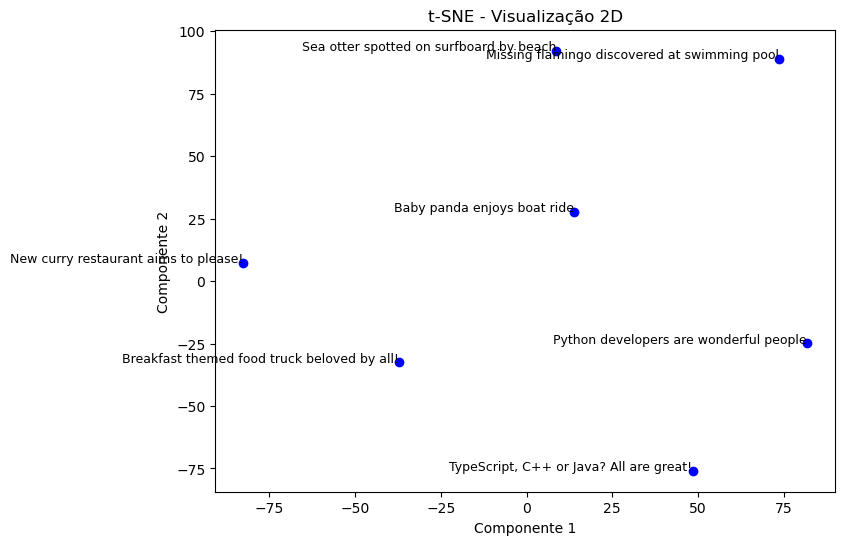

In [34]:
# Função para plotar os valores 2D
def plot_2D(x, y, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', marker='o')  # Plotando os pontos
    
    # Adicionando as labels
    for i, label in enumerate(labels):
        plt.text(x[i], y[i], label, fontsize=9, ha='right')
    
    plt.title("t-SNE - Visualização 2D")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

# Extrair as 2 componentes principais (colunas 0 e 1)
x = new_values[:, 0]  # Componente 1
y = new_values[:, 1]  # Componente 2

# Agora, use a função plot_2D para visualizar os resultados
plot_2D(x, y, input_text_lst_news)

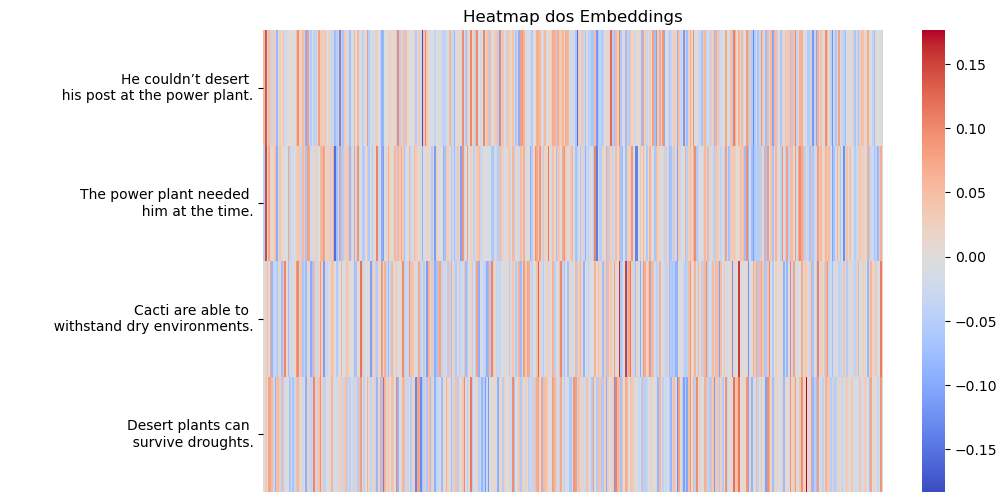

In [35]:
# Utilizado o modelo direto mudando alguns texto e gerando um heatmap para identificar padrões similares entre os embeddings gerados
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Carregar o modelo
model = SentenceTransformer('all-MiniLM-L6-v2')

# Definir seus textos
in_1 = """He couldn’t desert 
          his post at the power plant."""

in_2 = """The power plant needed 
          him at the time."""

in_3 = """Cacti are able to 
          withstand dry environments.""" 

in_4 = """Desert plants can 
          survive droughts.""" 

input_text_lst_sim = [in_1, in_2, in_3, in_4]

# Gerar os embeddings para cada texto
embeddings = []
for input_text in input_text_lst_sim:
    emb = model.encode([input_text])[0]
    embeddings.append(emb)

# Converter para um array NumPy
embeddings_array = np.array(embeddings)

# Criar o heatmap
plt.figure(figsize=(10, 6))  # Tamanho da figura
sns.heatmap(embeddings_array, cmap='coolwarm', xticklabels=False, yticklabels=input_text_lst_sim)

# Adicionar título
plt.title("Heatmap dos Embeddings")

# Exibir o heatmap
plt.show()


In [36]:
# Calculo da similaridade cosseno dos embeddings
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [38]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

He couldn’t desert 
          his post at the power plant.
The power plant needed 
          him at the time.
[[0.6270483]]


In [39]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

He couldn’t desert 
          his post at the power plant.
Desert plants can 
          survive droughts.
[[0.3840042]]
